<a href="https://colab.research.google.com/github/Anushkapilena2701/SPIT/blob/main/DA_Exp5_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Anushka Anil Pilena

Roll no- 2018110036

Lab- Data Analytics 

batch A

Topic- Titanic Survival Compitition

In [53]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [54]:
# Loading training data
data = pd.read_csv('train.csv')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [58]:
# dropping Unnecessary Features
data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [59]:
# Unique Data 
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [60]:
# Null Data
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Name**

In [61]:
# Taking Initials from Name and Implement a new Feature
data['Initials'] = 0
data['Initials'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [62]:
pd.crosstab(data.Survived, data.Initials, margins = True)

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [63]:
data['Initials'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [64]:
pd.crosstab(data.Initials, data.Survived, margins = True)

Survived,0,1,All
Initials,,,
Master,17,23,40
Miss,55,131,186
Mr,443,86,529
Mrs,26,101,127
Other,8,1,9
All,549,342,891


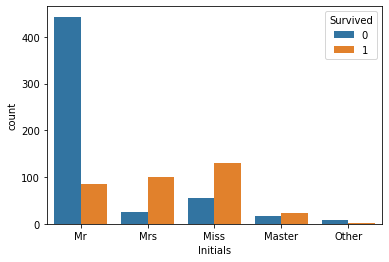

In [65]:
sns.countplot(x='Initials', hue='Survived', data=data)

**Age**

In [66]:
# filling age
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
# Getting Age mean wrt Initials data
data.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [68]:
# Filling Null Value from Age mean wrt Initials
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initials'] == 'Other'), 'Age'] = 46

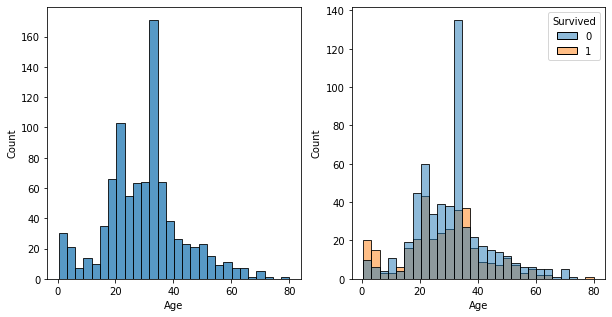

In [69]:
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x = 'Age', data=data, ax=ax[0])
sns.histplot(x = 'Age', hue='Survived', data=data, ax=ax[1])

* Survival rate for Childrens, Teenagers and Elders are more than normal Adults.
* People Onboard are usually from age group 30 to 40 and have low survival rate.

**Pclass**

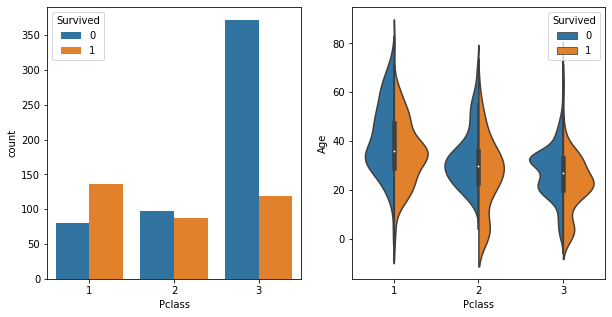

In [70]:
# Pclass
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Pclass', hue='Survived', data=data, ax=ax[0])
sns.violinplot(y = 'Age', x = 'Pclass', hue='Survived', data=data, split=True, ax=ax[1])
plt.show()

In [71]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* Survival rate of PClass 1 is 62.9629% which is much better than any class.
* Irrespective of Pclass, Childrens and Tennagers have high survival rate

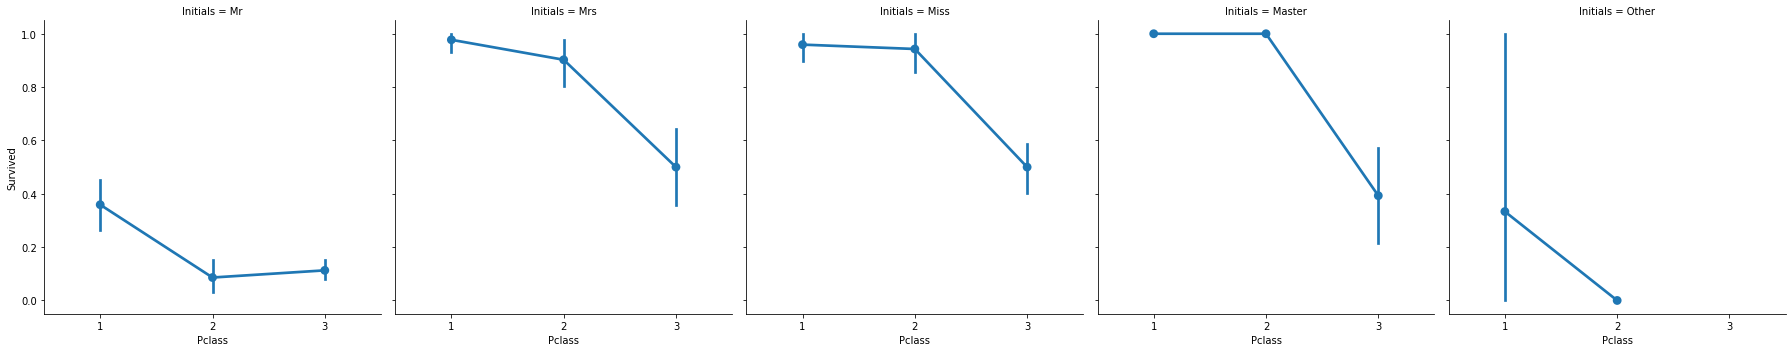

In [72]:
sns.catplot(x='Pclass', y='Survived', col='Initials', data=data, kind='point')

* Survival rate for Initials with Mrs, Miss, and Master are much higher than Mr.

**Sex**

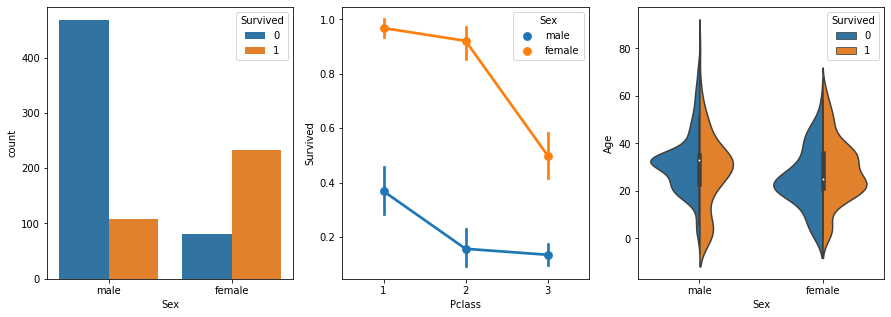

In [73]:
f, ax = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[0])
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data, ax=ax[1])
sns.violinplot(y = 'Age', x = 'Sex', hue='Survived', data=data, split=True, ax=ax[2])

In [74]:
pd.crosstab([data.Pclass, data.Sex], data.Survived, margins =True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

* Females have much higher survival rate than males in Pclass 1 and 2
* Males from Pclass 1 have high survival rate i.e. 36.885% survival rate while 13.544% for Pclass 3
* Females from Pclass 3 have 50% survival rate 
* Male child have high survival rate than female childs.

**SibSp**

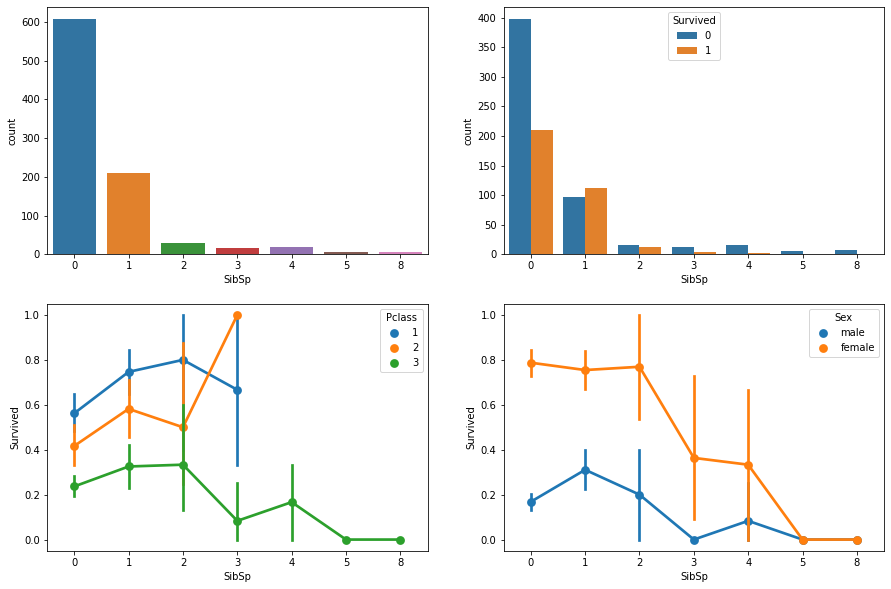

In [75]:
f,ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'SibSp', data=data, ax=ax[0][0])
sns.countplot(x = 'SibSp', hue='Survived', data=data, ax=ax[0][1])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Pclass', data=data, ax=ax[1][0])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Sex', data=data, ax=ax[1][1])

In [76]:
pd.crosstab(data.Survived,[data.SibSp, data.Sex], margins=True)

SibSp         0           1           2           3           4           5  \
Sex      female male female male female male female male female male female   
Survived                                                                      
0            37  361     26   71      3   12      7    5      4   11      1   
1           137   73     80   32     10    3      4    0      2    1      0   
All         174  434    106  103     13   15     11    5      6   12      1   

SibSp              8       All  
Sex      male female male       
Survived                        
0           4      3    4  549  
1           0      0    0  342  
All         4      3    4  891

* Numbers of Passengers with more than 1 siblings decreases significantly.
* Males with zero siblings are more in numbers and 83% of them died.
* Survival rate keeps decreasing with the increment of Siblings.

**Parch**

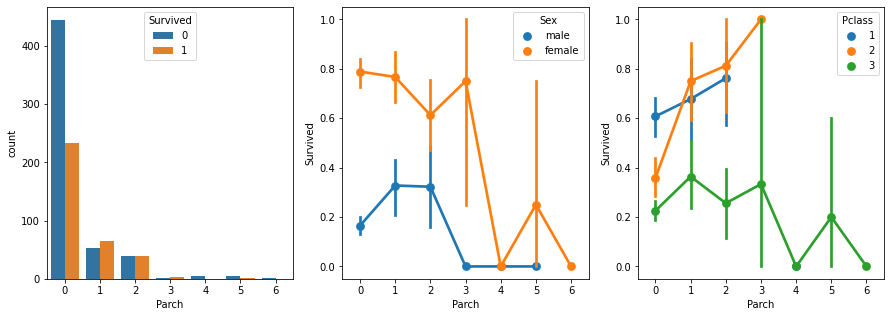

In [77]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x='Parch', hue= 'Survived', data=data, ax=ax[0])
sns.pointplot(x='Parch', y= 'Survived', hue='Sex', data=data, ax=ax[1])
sns.pointplot(x='Parch', y= 'Survived', hue='Pclass', data=data, ax=ax[2])

In [78]:
pd.crosstab([data.Survived],[data.Parch], margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


* 76% passengers come onboard with no parents/children which reduces significantly to 1.6% with 3 or more Parch.
* Males with 1 or 2 Parents/children survived more.

**Fare**

In [79]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [80]:
# Mean of Fare wrt Pclass
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [81]:
# Removing Outliers
data.drop(data[data['Fare'] > 85].index.to_list(), axis=0, inplace=True)

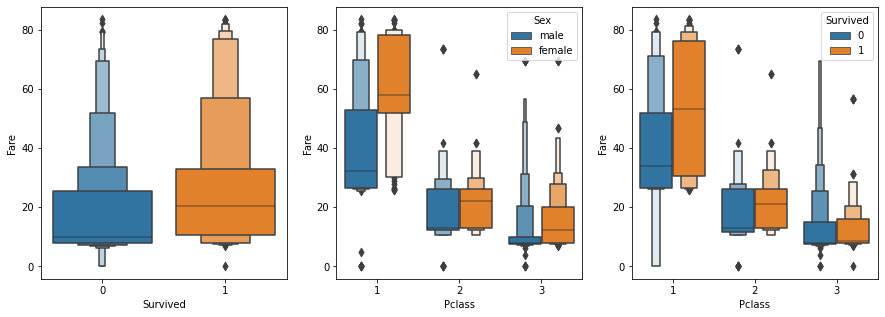

In [82]:
f,ax = plt.subplots(1,3, figsize=(15,5))
sns.boxenplot(data=data, y='Fare', x='Survived', ax=ax[0])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Sex', ax=ax[1])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Survived', ax=ax[2])

* Fare for Females in Pclass 1 and 3 is higher than Males

**Embarked**

In [83]:
data['Embarked'].describe()

count     823
unique      3
top         S
freq      613
Name: Embarked, dtype: object

In [84]:
# Filling nan value with most frequent value
data.Embarked.fillna('S', axis=0, inplace=True)

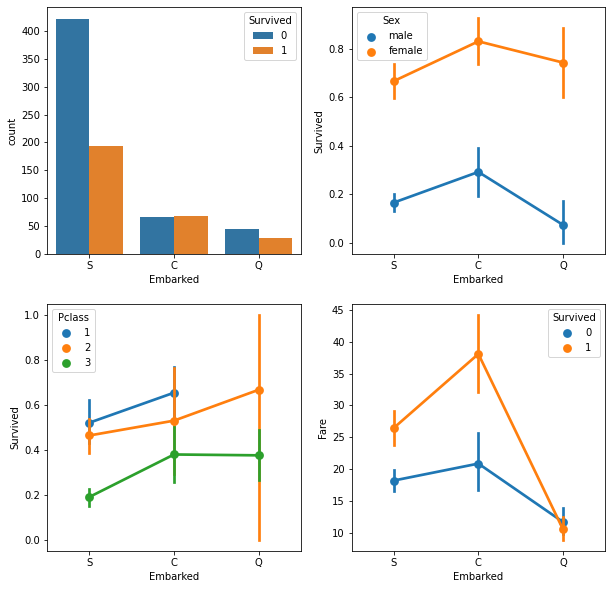

In [85]:
f,ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[0][0])
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=data, ax=ax[0][1])
sns.pointplot(x='Embarked', y='Survived', hue='Pclass', data=data, ax=ax[1][0])
sns.pointplot(x='Embarked', y='Fare', hue='Survived', data=data, ax=ax[1][1])

In [86]:
pd.crosstab([data.Embarked, data.Pclass], [data.Survived], margins=True)

Survived           0    1  All
Embarked Pclass               
C        1        18   34   52
         2         8    9   17
         3        41   25   66
Q        2         1    2    3
         3        45   27   72
S        1        47   51   98
         2        88   76  164
         3       286   67  353
All              534  291  825

In [87]:
pd.crosstab([data.Embarked, data.Sex], [data.Survived], margins=True)

Survived           0    1  All
Embarked Sex                  
C        female    9   44   53
         male     58   24   82
Q        female    9   26   35
         male     37    3   40
S        female   61  122  183
         male    360   72  432
All              534  291  825

* C = Cherbourg, Q = Queenstown, S = Southampton
* No one from Pclass 1 aboard from Queenstown and Mostly Pclass 3 aboard from there.
* Maximum Number of people aboard from Southampton
* Passengers aboard from Cherbourg have high Fare and Survival Rate.

## Observations
* Pclass 1 have high survival rate i.e. 62%.
* Males have low survival rate than Females.
* Males from Pclass1 have higher survival rate of 36% than any other Pclass.
* Females had high fare for Pclass 1 & 3 and high survival for every Pclass.
* Children had high survival, especially male children.
* 76% passengers aboard with zero siblings and parents.
* Passengers with more than 2 siblings/parents decreases significantly in number.
* 83% Males with zero siblings died while Males with 1 Sibling or Parent survived more.
* No Pclass 1 passengers aboard from Queenstown.
* Maximum number of passengers aboard from Southampton.
* Passengers aboard from cherbourg had high fare and survival rate.
* Passengers from Age Group of 30 to 40 are high in number but also low survival rate

# Data Preprocessing

In [88]:
feature_list = ['Embarked', 'Initials', 'SibSp', 'Fare', 'Age', 'Pclass']

In [89]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [90]:
X = data[feature_list]
y = data['Survived'].values

In [91]:
# Encoding Using One Hot Encoder Method with pandas .get_dummies function:
X = pd.get_dummies(X)

In [92]:
X.head()

,SibSp,Fare,Age,Pclass,Embarked_C,Embarked_Q,Embarked_S,Initials_Master,Initials_Miss,Initials_Mr,Initials_Mrs,Initials_Other
0,1,7.2500,22.0,3,0,0,1,0,0,1,0,0
1,1,71.2833,38.0,1,1,0,0,0,0,0,1,0
2,0,7.9250,26.0,3,0,0,1,0,1,0,0,0
3,1,53.1000,35.0,1,0,0,1,0,0,0,1,0
4,0,8.0500,35.0,3,0,0,1,0,0,1,0,0


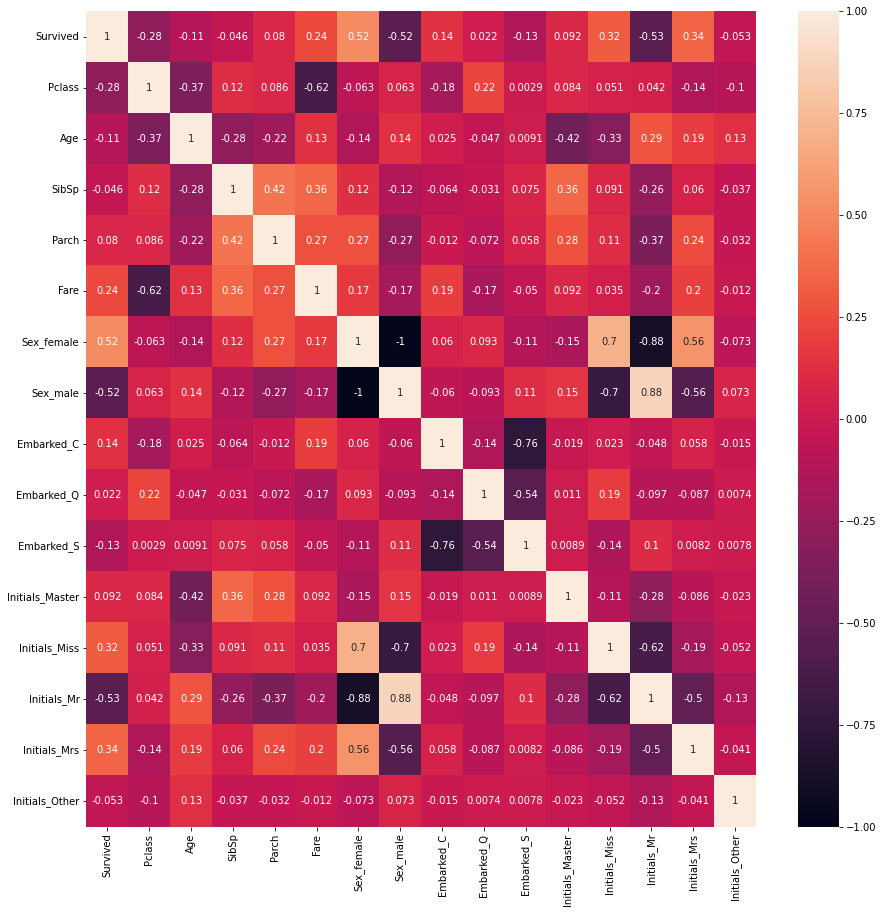

In [93]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(data=pd.get_dummies(data.drop('Name', axis=1)).corr(), annot=True)

In [94]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_clean = scaler.fit_transform(xtrain)
X_test_clean = scaler.transform(xtest)

# Model Implementation

**Linear Logistic Model**

In [96]:
from sklearn.linear_model import LogisticRegression
class1 = LogisticRegression(random_state=1)
class1.fit(X_clean, ytrain)
ypred1 = class1.predict(X_test_clean)
print(classification_report(ytest, ypred1))
accuracy_score(ypred1, ytest)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       106
           1       0.86      0.73      0.79        59

    accuracy                           0.86       165
   macro avg       0.86      0.83      0.84       165
weighted avg       0.86      0.86      0.86       165



0.8606060606060606

**SVM Model**

In [97]:
from sklearn.svm import SVC
class2 = SVC(kernel = 'rbf', random_state=1)
class2.fit(X_clean, ytrain)
ypred2 = class2.predict(X_test_clean)
print(classification_report(ytest, ypred2))
accuracy_score(ypred2, ytest)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       106
           1       0.92      0.56      0.69        59

    accuracy                           0.82       165
   macro avg       0.86      0.77      0.79       165
weighted avg       0.84      0.82      0.81       165



0.8242424242424242

**KNN Model**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
class3 = KNeighborsClassifier(n_neighbors=5)
class3.fit(X_clean, ytrain)
ypred3 = class3.predict(X_test_clean)
print(classification_report(ytest, ypred3))
accuracy_score(ypred3, ytest)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       106
           1       0.82      0.71      0.76        59

    accuracy                           0.84       165
   macro avg       0.84      0.81      0.82       165
weighted avg       0.84      0.84      0.84       165



0.8424242424242424

**Decision Tree Model**

In [99]:
from sklearn.tree import DecisionTreeClassifier
class4 = DecisionTreeClassifier(max_depth=10, random_state=1)
class4.fit(xtrain, ytrain)
ypred4 = class4.predict(xtest)
print(classification_report(ytest, ypred4))
accuracy_score(ypred4, ytest)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       106
           1       0.74      0.58      0.65        59

    accuracy                           0.78       165
   macro avg       0.76      0.73      0.74       165
weighted avg       0.77      0.78      0.77       165



0.7757575757575758

**Random Forest Model**

In [100]:
from sklearn.ensemble import RandomForestClassifier
class5 = RandomForestClassifier(n_estimators=10, random_state=1)
class5.fit(xtrain, ytrain)
ypred5 = class5.predict(xtest)
print(classification_report(ytest, ypred5))
accuracy_score(ypred5, ytest)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       106
           1       0.78      0.66      0.72        59

    accuracy                           0.81       165
   macro avg       0.80      0.78      0.79       165
weighted avg       0.81      0.81      0.81       165



0.8121212121212121

**Naive Bayes**

In [101]:
from sklearn.naive_bayes import BernoulliNB
class7 = BernoulliNB()
class7.fit(xtrain, ytrain)
ypred7 = class7.predict(xtest)
print(classification_report(ytest, ypred7))
accuracy_score(ypred7, ytest)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       106
           1       0.72      0.75      0.73        59

    accuracy                           0.81       165
   macro avg       0.79      0.79      0.79       165
weighted avg       0.81      0.81      0.81       165



0.806060606060606

# Test Data preprocessing

In [102]:
test_data = pd.read_csv('test.csv')

In [103]:
test_data['Initials'] = 0
test_data['Initials'] = test_data['Name'].str.extract('([A-Za-z]+)\.')

In [104]:
test_data['Initials'].replace(['Col', 'Dona', 'Dr', 'Ms', 'Rev'], ['Other', 'Mr', 'Mr', 'Miss', 'Other'], inplace=True)

In [105]:
# Filling nan values in test data using Train data
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Master'), 'Age'] = 5
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Miss'), 'Age'] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Mr'), 'Age'] = 33
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Mrs'), 'Age'] = 36
test_data.loc[(test_data.Age.isnull()) & (test_data['Initials'] == 'Other'), 'Age'] = 46

In [106]:
test_data['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [107]:
# Replacing nan value from Fare in test Data using mean
test_data['Fare'].replace(np.nan, 35.62, inplace=True)

In [108]:
test_data = test_data[feature_list]

In [109]:
# Categorial data conversion using One Hot Encoder
test_data= pd.get_dummies(test_data)

In [110]:
test_data.head()

,SibSp,Fare,Age,Pclass,Embarked_C,Embarked_Q,Embarked_S,Initials_Master,Initials_Miss,Initials_Mr,Initials_Mrs,Initials_Other
0,0,7.8292,34.5,3,0,1,0,0,0,1,0,0
1,1,7.0000,47.0,3,0,0,1,0,0,0,1,0
2,0,9.6875,62.0,2,0,1,0,0,0,1,0,0
3,0,8.6625,27.0,3,0,0,1,0,0,1,0,0
4,1,12.2875,22.0,3,0,0,1,0,0,0,1,0


In [111]:
test_data.shape

(418, 12)

In [112]:
# Feature Scaling on test data
X_test_clean1 = scaler.transform(test_data)

# Final Model Deployement

In [113]:
ypredf = class3.predict(X_test_clean1)

In [114]:
ypredf.shape

(418,)

In [115]:
output = pd.DataFrame({'PassengerId': range(892, 1310),'Survived': ypredf})
output.to_csv('KNN.csv', index=False)